<a href="https://colab.research.google.com/github/Alhamdanaaa/PCVK_Ganjil_24-25/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. pastikan bahwa google Colab terhubung dengan Github Anda

In [3]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (28.9 MB/s)
debconf: unable to init

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum.


In [4]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## 3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.


(-0.5, 959.5, 539.5, -0.5)

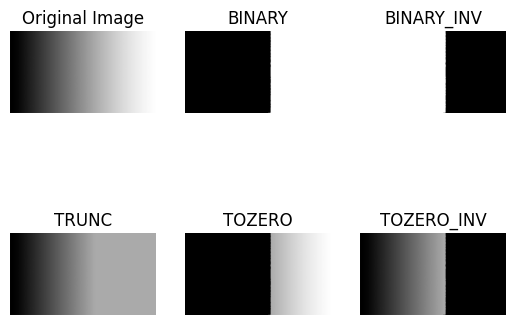

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpeg')
img = cv.imread(filename)
threshold = 170

binary = np.where(img>threshold,255,0)
binary_inv = np.where(img > threshold, 0, 255)
trunc = np.where(img > threshold, threshold, img)
tozero = np.where(img > threshold, img, 0)
tozero_inv = np.where(img > threshold, 0, img)

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('BINARY')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(binary_inv, cmap='gray')
plt.title('BINARY_INV')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(trunc, cmap='gray')
plt.title('TRUNC')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(tozero, cmap='gray')
plt.title('TOZERO')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(tozero_inv, cmap='gray')
plt.title('TOZERO_INV')
plt.axis('off')

## 4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

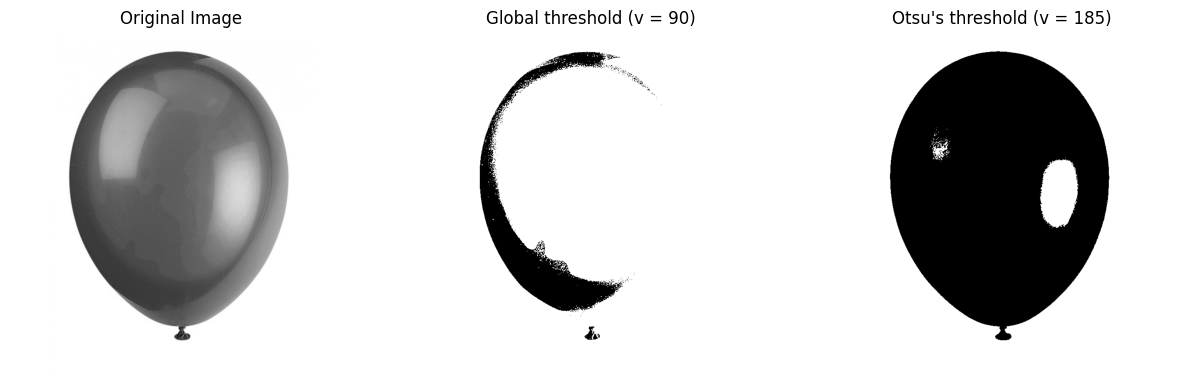

In [ ]:
def otsu_threshold(img):
    histogram, bins = np.histogram(img.ravel(), bins=256, range=(0, 256))
    total_pixels = img.size

    # Inisialisasi nilai variabel
    current_max_variance = 0
    threshold = 0

    # Total mean
    total_mean = np.sum(np.arange(256) * histogram) / total_pixels

    sum_b = 0  # Background sum
    weight_b = 0  # Background weight

    # Iterasi melalui semua nilai threshold
    for t in range(256):
        weight_b += histogram[t]
        if weight_b == 0:
            continue

        weight_f = total_pixels - weight_b
        if weight_f == 0:
            break

        sum_b += t * histogram[t]

        mean_b = sum_b / weight_b
        mean_f = (total_mean * total_pixels - sum_b) / weight_f

        # Menghitung varians antar-kelas
        between_class_variance = weight_b * weight_f * (mean_b - mean_f) ** 2

        # Memilih threshold yang memaksimalkan varians antar-kelas
        if between_class_variance > current_max_variance:
            current_max_variance = between_class_variance
            threshold = t

    # Terapkan threshold Otsu pada citra
    otsu_output = np.where(img > threshold, 255, 0).astype(np.uint8)

    # Threshold global
    global_threshold = 90
    global_output = np.where(img > global_threshold, 255, 0).astype(np.uint8)

    # Menampilkan gambar asli, hasil thresholding Otsu, dan Global Thresholding
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(global_output, cmap='gray')
    plt.title(f"Global threshold (v = {global_threshold})")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(otsu_output, cmap='gray')
    plt.title(f"Otsu's threshold (v = {threshold})")
    plt.axis('off')

    plt.show()

# Load gambar grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan Otsu Thresholding dan Global Thresholding
otsu_threshold(img)


## 5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg.

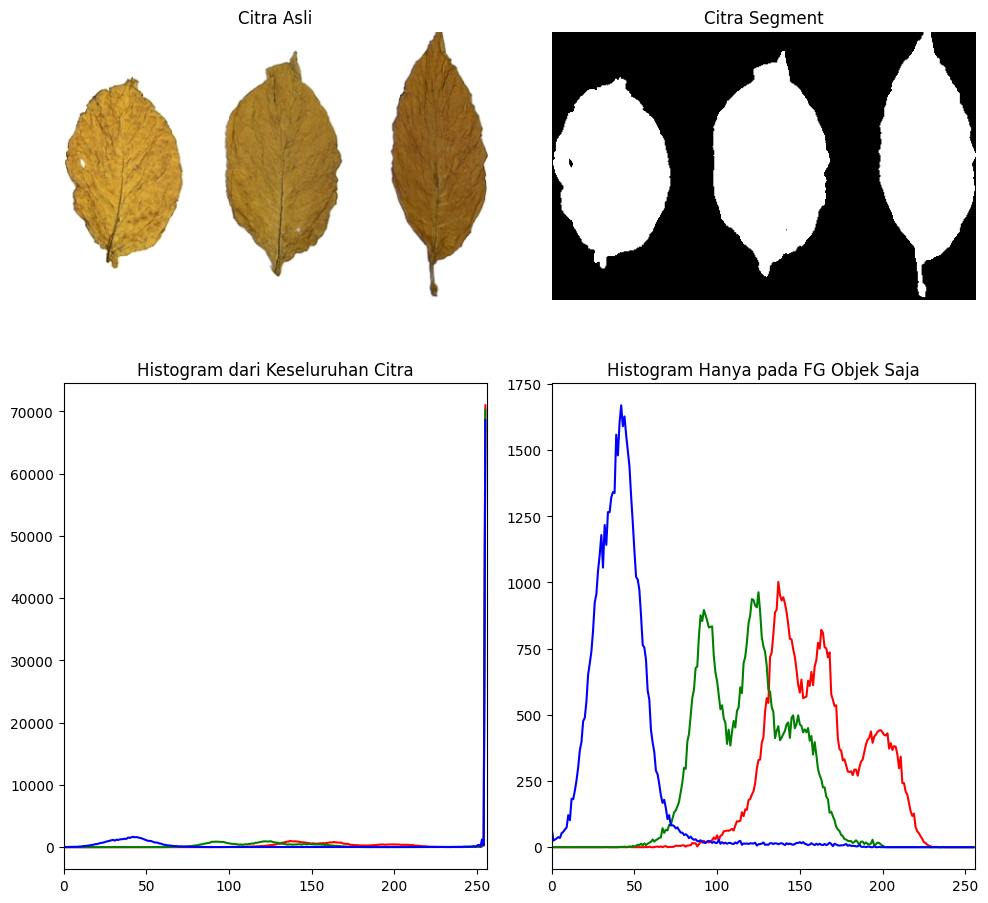

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi citra ke grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Buat mask menggunakan thresholding (menggunakan THRESH_BINARY_INV)
ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

# Menampilkan citra asli dan citra segmentasi (mask)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')
plt.axis('off')

colors = ('r', 'g', 'b')

# Histogram keseluruhan citra
plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist0 = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari Keseluruhan Citra')
plt.xlim([0, 256])

# Histogram hanya untuk foreground
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist1 = cv2.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


## 6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x78a48a4c7910>)

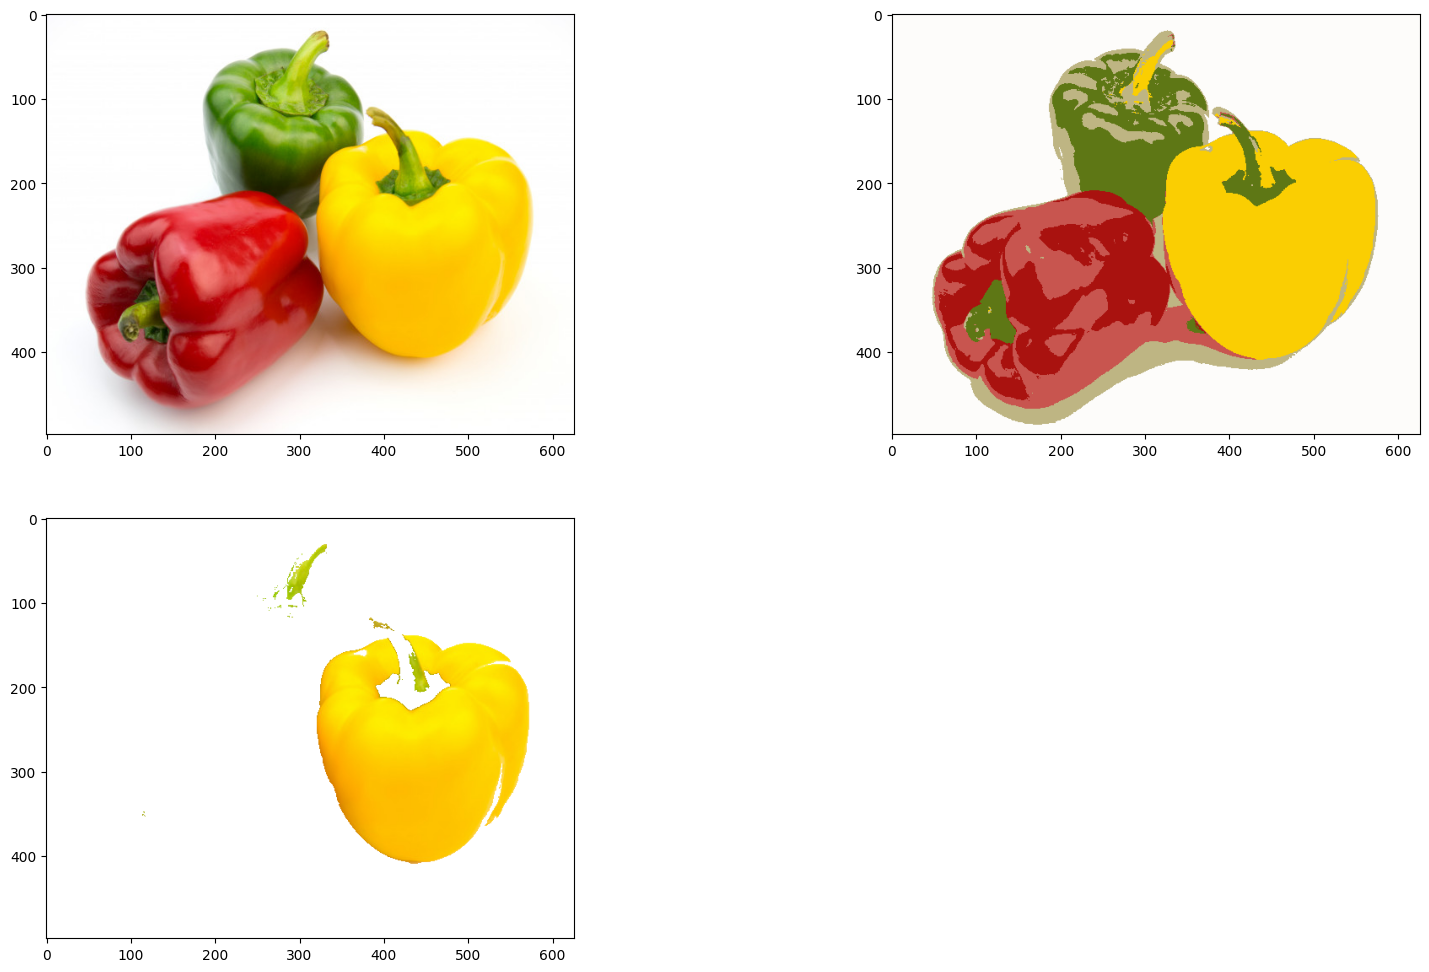

In [ ]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/peppers.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
# ubah pixel di cluster lain menjadi putih
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = [1,2,3,4,5]
for  i in cluster:
  masked_image[labels == i] = [255,255,255]

# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

### Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.


Kendala yang dialami adalah menampilkan gambar yang diinginkan, dikarenakan kmeans akan melakukan pemrosesan secara random, sehingga hasil yang akan ditampilkan mungkin berbeda pada tiap kali program dijalankan

## 7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda.

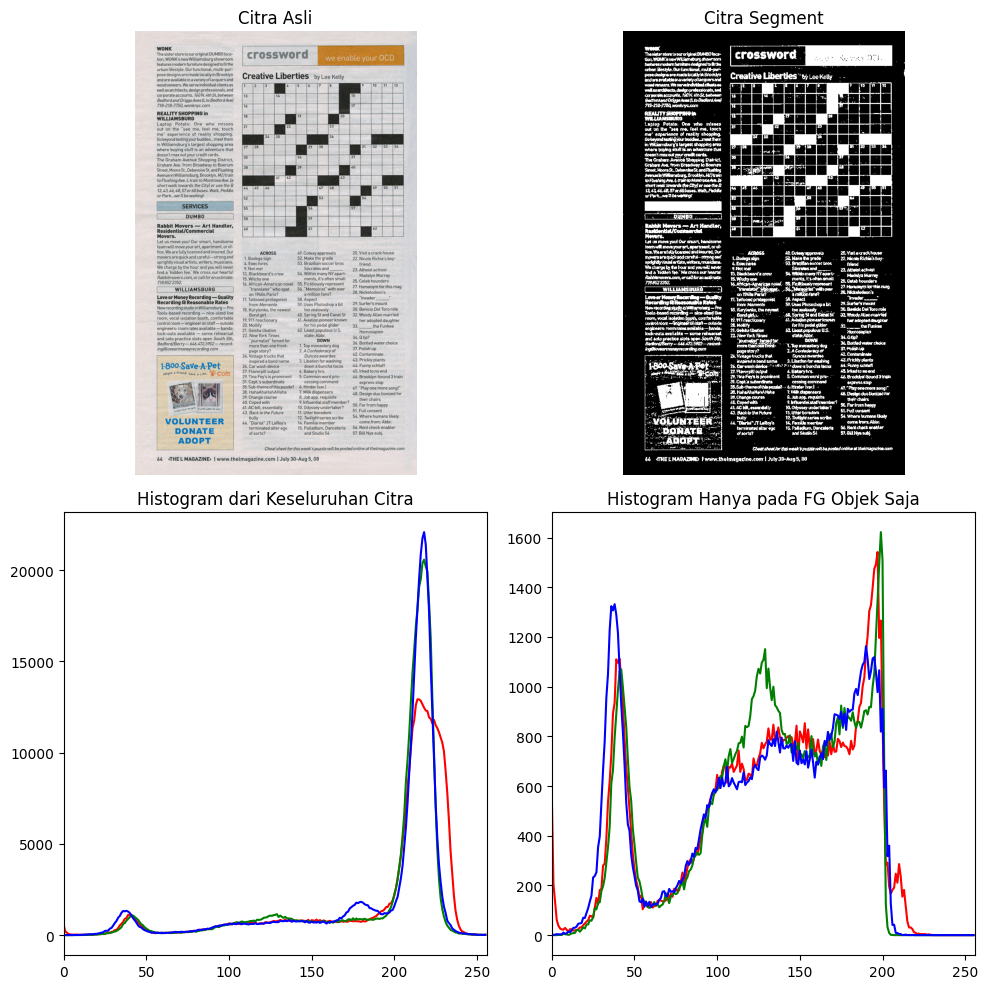

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Konversi citra ke grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)

# Buat mask menggunakan thresholding (menggunakan THRESH_BINARY_INV)
ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

# Menampilkan citra asli dan citra segmentasi (mask)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')
plt.axis('off')

colors = ('r', 'g', 'b')

# Histogram keseluruhan citra
plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist0 = cv.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari Keseluruhan Citra')
plt.xlim([0, 256])

# Histogram hanya untuk foreground
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist1 = cv.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
